# 系数量化噪声建模

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter
import scipy.signal as signal

def plot_coeff_quant_err(
    fc,
    fs,
    signal_range,
    b_bit,
    a_bit,
    btype = 'low'
):
    num_points = 65536
    b, a = signal.butter(2, fc / (fs / 2), btype=btype)

    # 定点量化
    quant_b_scale = 2 ** b_bit
    quant_a_scale = 2 ** a_bit
    b_q = np.round(b * quant_b_scale) / quant_b_scale
    a_q = np.round(a * quant_a_scale) / quant_a_scale

    # 计算频率响应
    w, h = signal.freqz(b, a, worN=num_points)
    w_q, h_q = signal.freqz(b_q, a_q, worN=num_points)

    # 量化误差（取最大响应差 × 信号幅度）
    quant_err = signal_range * np.abs(h - h_q)

    # 计算截止频率对应的归一化频率
    fc_normalized = fc / (fs / 2)

    # 绘制量化后的频率响应
    plt.figure(figsize=(8, 6))
    plt.plot(w_q / np.pi, quant_err, label="Quantized Error Frequency Response")
    plt.xscale('log')

    # 绘制截止频率线
    plt.axvline(x=fc_normalized, color='r', linestyle='--', label="Cutoff Frequency")

    # 设置图表标题和标签
    plt.title(f"fc/fs={fc / fs}, Quantized Error Frequency Response")
    plt.xlabel("Normalized Frequency (π rad/sample)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()

    # 显示图形
    plt.show()


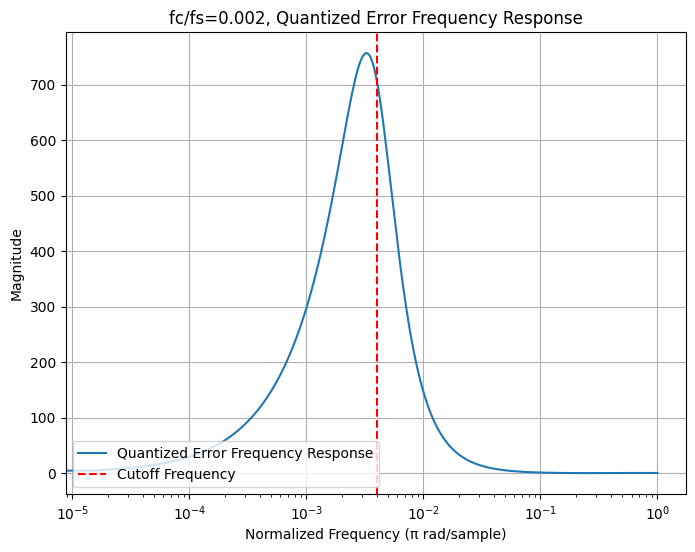

In [6]:
# 设计二阶巴特沃斯滤波器
fc = 20
fs = 10000
signal_range = 32767
btype = 'low'
b_bit = 15
a_bit = 15

plot_coeff_quant_err(
    fc,
    fs,
    signal_range,
    b_bit,
    a_bit,
    btype = 'low'
)